In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
!ls "/content/gdrive/MyDrive/data"

Mounted at /content/gdrive
 face.csv	        feature_extractByPretrain.npy
 faceData	        model4emotionClassfier
 faceData2D	        model4multiClassfier
 faceData2DWithNumber  'model4multiClassfier(exceptAge)'
 face_Dataset	        model4raceClassfier
 faceDataset	        model4sexClassfier
 faceDataset2	        model4sexClassfierWithoutValid
 faceDataWithNumber     rawdata
 faceDR		        rawdata.zip
 faceDS		        vgg_face_dag.pth
 faceLabel.csv


In [2]:
!pip install keras_vggface
!pip install keras_applications
# !pip install keras==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt  # show image
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Only work in TPU
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.TPUStrategy(tpu)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
dtype = np.uint8
shape = (128,128)

# file_path /content/gdrive/My Drive/data/rawdata/xxxx
pre_img_path="/content/gdrive/MyDrive/data/rawdata/"
pre_path="/content/gdrive/MyDrive/data/"

# Read the data from the binary file
# data = np.fromfile(file_path, dtype=dtype).reshape(shape)

In [7]:
!unzip "/content/gdrive/MyDrive/data/rawdata.zip" -d /content/sample_data/rawdataFolder

Archive:  /content/gdrive/MyDrive/data/rawdata.zip
   creating: /content/sample_data/rawdataFolder/rawdata/
  inflating: /content/sample_data/rawdataFolder/rawdata/1223  
  inflating: /content/sample_data/rawdataFolder/rawdata/1224  
  inflating: /content/sample_data/rawdataFolder/rawdata/1225  
  inflating: /content/sample_data/rawdataFolder/rawdata/1226  
  inflating: /content/sample_data/rawdataFolder/rawdata/1227  
  inflating: /content/sample_data/rawdataFolder/rawdata/1229  
  inflating: /content/sample_data/rawdataFolder/rawdata/1230  
  inflating: /content/sample_data/rawdataFolder/rawdata/1231  
  inflating: /content/sample_data/rawdataFolder/rawdata/1233  
  inflating: /content/sample_data/rawdataFolder/rawdata/1234  
  inflating: /content/sample_data/rawdataFolder/rawdata/1235  
  inflating: /content/sample_data/rawdataFolder/rawdata/1236  
  inflating: /content/sample_data/rawdataFolder/rawdata/1237  
  inflating: /content/sample_data/rawdataFolder/rawdata/1238  
  inflatin

In [8]:
pre_img_path="/content/sample_data/rawdataFolder/"

In [9]:


# def readImage(path):
#     with open(path,'rb') as f:
#         # print(path)
#         data = np.fromfile(f, dtype=np.uint8)
#         image_array=np.reshape(data,(128,128))
#         return image_array
#         # return data

face=pd.read_csv(pre_path+"faceLabel.csv")

# read image part
new=True
for  i in face["number"]:
    # number=1223
    if new==True:
        path=pre_img_path+f"rawdata/{i}"
        new_element = np.fromfile(path, dtype=dtype).reshape(shape)
        dataset = tf.data.Dataset.from_tensor_slices([new_element])
        new=False
    else:
        path=pre_img_path+f"rawdata/{i}"
        data = np.fromfile(path, dtype=dtype).reshape(shape)
        new_element = tf.data.Dataset.from_tensor_slices([data])
        dataset = dataset.concatenate(new_element)
    # if i>1230:
    #     break
# print(faceData.shape)
# faceData.to_pickle("faceData2D")
# dataset=tf.data.Dataset.load(pre_path+"faceDataset")
print(dataset)


# print(faceData)

# plt.imshow(np.reshape(faceData.iloc[0,1],(128,128)), cmap='cividis', vmin=0, vmax=256)
# plt.show()

<_ConcatenateDataset element_spec=TensorSpec(shape=(128, 128), dtype=tf.uint8, name=None)>


In [10]:
face.head()

,number,sex,age,race,emotion,extra,sex_label,age_adult,age_child,age_senior,...,race_black,race_hispanic,race_other,race_white,emotion_funny,emotion_serious,emotion_smiling,race_label,emotion_label,age_label
0,1223,male,child,white,smiling,NaN,1,0,1,0,...,0,0,0,1,0,0,1,4,2,1
1,1224,male,child,white,serious,NaN,1,0,1,0,...,0,0,0,1,0,1,0,4,1,1
2,1225,male,child,white,smiling,NaN,1,0,1,0,...,0,0,0,1,0,0,1,4,2,1
3,1226,male,child,white,smiling,NaN,1,0,1,0,...,0,0,0,1,0,0,1,4,2,1
4,1227,male,child,white,serious,NaN,1,0,1,0,...,0,0,0,1,0,1,0,4,1,1


In [11]:
# tf.data.experimental.save(dataset, pre_path+"faceDataset")
# tf.data.Dataset.save(dataset, pre_path+"faceDataset")

In [12]:
# num_elements = tf.data.experimental.cardinality(dataset).numpy()

# print(f"The concatenated dataset has {num_elements} elements.")

In [13]:
def convert_image(image):
    image = tf.expand_dims(image, axis=0)
    image = tf.expand_dims(image, axis=-1)
    return tf.tile(image, [1, 1, 1, 3])
dataset_ = dataset.map(convert_image)

In [14]:
print(dataset_)

<_MapDataset element_spec=TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None)>


In [15]:
num_elements = tf.data.experimental.cardinality(dataset_).numpy()
print(f"The dataset has {num_elements} elements.")

The dataset has 3993 elements.


In [16]:
# def add_batch_dimension(image):
#     return tf.expand_dims(image, axis=0)
# dataset_ = dataset_.map(convert_image)

In [120]:
# convert dataframe to tensor
# label_tensor=tf.convert_to_tensor(face["sex_label"].values)
# label_tensor=tf.convert_to_tensor(face[["sex_label","age_adult","age_child","age_senior","age_teen","race_asian","race_black","race_hispanic","race_other","race_white","emotion_funny","emotion_serious","emotion_smiling"]].values)
# label_tensor=tf.convert_to_tensor(face[["race_asian","race_black","race_hispanic","race_other","race_white"]].values)
label_tensor=tf.convert_to_tensor(face[["emotion_funny","emotion_serious","emotion_smiling"]].values)
# label_tensor=tf.convert_to_tensor(face[["age_adult","age_child","age_senior","age_teen"]].values)
# label_tensor=tf.convert_to_tensor(face[["sex_label","race_black","race_hispanic","race_other","race_white","emotion_funny","emotion_serious","emotion_smiling"]].values)

In [121]:
label_tensor.shape

TensorShape([3993, 3])

In [ ]:
num_out_put=label_tensor.shape[1]
# num_out_put=1
print(label_tensor)

In [123]:
label_tensor_=tf.data.Dataset.from_tensor_slices(label_tensor)

In [124]:
label_tensor_=tf.reshape(label_tensor,(num_elements,1,num_out_put))
label_tensor__=tf.data.Dataset.from_tensor_slices(label_tensor_)

In [125]:
# merge label and data
data_=tf.data.Dataset.zip((dataset_,label_tensor__))
# data_=tf.stack([dataset,label_tensor_.take(8)])

In [23]:
# tf.data.experimental.save(data_, pre_path+"face_Dataset")

In [126]:
print(data_)

<_ZipDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1, 3), dtype=tf.int64, name=None))>


In [127]:
# split train and test sets
# 计算训练集大小（例如，80% 的数据用于训练）
train_size = int(num_elements * 0.8)

# 使用 take 方法获取训练集
ds_train_ = data_.take(train_size)

# 使用 skip 方法获取测试集
ds_valid_ = data_.skip(train_size)

In [128]:
print(ds_valid_)

<_SkipDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1, 3), dtype=tf.int64, name=None))>


In [129]:
# Data Pipeline
def convert_to_float(image,label ):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [130]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1, 3), dtype=tf.int64, name=None))>

# 1) Define Pretrained Base #

Now that you have a pretrained base to do our feature extraction, decide whether this base should be trainable or not.

The **InceptionV1** model pretrained on ImageNet is available in the [TensorFlow Hub](https://www.tensorflow.org/hub/) repository, but we'll load it from a local copy. Run this cell to load InceptionV1 for your base.

In [131]:
import tensorflow_hub as hub


In [132]:
# pretrained_base.trainable = True

# 3) Train #

Before training a model in Keras, you need to specify an *optimizer* to perform the gradient descent, a *loss function* to be minimized, and (optionally) any *performance metrics*. The optimization algorithm we'll use for this course is called ["Adam"](https://keras.io/api/optimizers/adam/), which generally performs well regardless of what kind of problem you're trying to solve.

The loss and the metrics, however, need to match the kind of problem you're trying to solve. Our problem is a **binary classification** problem: `Car` coded as 0, and `Truck` coded as 1. Choose an appropriate loss and an appropriate accuracy metric for binary classification.

In [244]:
# inception_V1
# pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5")
# Resnet_V2
# pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5")
# Mobilenet_V2
pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_128/feature_vector/5")

In [245]:
from keras import backend as K

def f1_score(y_true, y_pred):
    # Calculate the true positives, false positives, and false negatives
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    false_positives = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    false_negatives = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    # Calculate the precision and recall
    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())

    # Calculate the F1 score
    f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return f1_score

In [246]:
def creat_model():
  import tensorflow_hub as hub
  # from tensorflow.keras.applications.inception_v3 import InceptionV3
  # 实例化一个预训练好的InceptionV3模型
  # pretrained_base = InceptionV3(weights='imagenet',include_top=False,input_shape=(128, 128, 3))
  # pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5")
  # pretrained_base.trainable = True
  model_TPU = keras.Sequential([
  pretrained_base,
  layers.Flatten(),
  # layers.Dropout(0.1),
  layers.Dense(500, activation='relu'),
  layers.Dropout(0.2),
  # layers.Dense(num_out_put, activation='sigmoid'),
  layers.Dense(num_out_put, activation='softmax'),
])
  model_TPU.compile(
    optimizer="adam",
    # loss='binary_crossentropy',
    loss='categorical_crossentropy',
    metrics=['accuracy',f1_score],
)
  return model_TPU
def creat_Mymodel():
  import tensorflow_hub as hub
  model_TPU = keras.Sequential([
  layers.Conv2D(32, (6, 6), activation='relu', input_shape=(128, 128, 3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (5, 5), activation='relu' ),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(128, (4, 4), activation='relu' ),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, (3, 3), activation='relu' ),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  # layers.Dropout(0.1),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_out_put, activation='sigmoid'),
  # layers.Dense(num_out_put, activation='softmax'),
])
  model_TPU.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    # loss='categorical_crossentropy',
    metrics=['accuracy',f1_score],
)
  return model_TPU
if "tpu_strategy" in globals():
  with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
    # from tensorflow.keras.applications.inception_v3 import InceptionV3
    # pretrained_base_TPU = InceptionV3(weights='imagenet',include_top=False,input_shape=(128, 128, 3))
    # pretrained_base_TPU.trainable = True
    model=creat_model()
else:
  model=creat_model()



In [247]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping



checkpoint = ModelCheckpoint('model-{epoch:02d}.h5', save_weights_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True)

In [248]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=200,
    callbacks=[checkpoint,early_stopping]
)

Epoch 1/200
3194/3194 [==============================] - 41s 12ms/step - loss: 0.8344 - accuracy: 0.6218 - f1_score: 0.5523 - val_loss: 0.7411 - val_accuracy: 0.6133 - val_f1_score: 0.6008
Epoch 2/200
3194/3194 [==============================] - 28s 9ms/step - loss: 0.7236 - accuracy: 0.6590 - f1_score: 0.5961 - val_loss: 0.7072 - val_accuracy: 0.6433 - val_f1_score: 0.6245
Epoch 3/200
3194/3194 [==============================] - 33s 10ms/step - loss: 0.6793 - accuracy: 0.6797 - f1_score: 0.6324 - val_loss: 0.7277 - val_accuracy: 0.6783 - val_f1_score: 0.6721
Epoch 4/200
3194/3194 [==============================] - 29s 9ms/step - loss: 0.6241 - accuracy: 0.7148 - f1_score: 0.6731 - val_loss: 0.7549 - val_accuracy: 0.6783 - val_f1_score: 0.6658
Epoch 5/200
3194/3194 [==============================] - 32s 10ms/step - loss: 0.6139 - accuracy: 0.7257 - f1_score: 0.6813 - val_loss: 0.6993 - val_accuracy: 0.6809 - val_f1_score: 0.6708
Epoch 6/200
3194/3194 [==============================] - 

Run the cell below to plot the loss and metric curves for this training run.

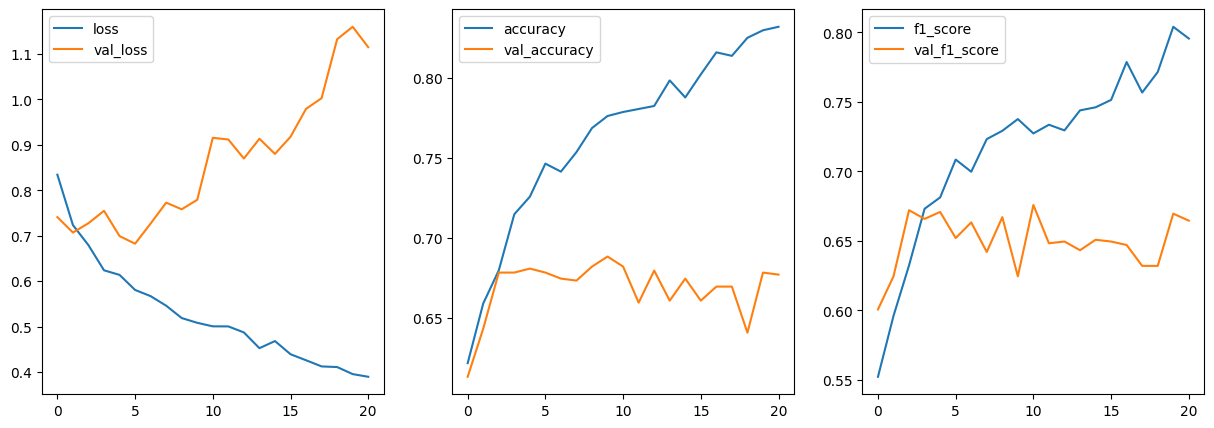

In [249]:
# import pandas as pd
history_frame = pd.DataFrame(history.history)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
history_frame.loc[:, ['loss', 'val_loss']].plot(ax=axs[0])
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot(ax=axs[1])
history_frame.loc[:, ['f1_score','val_f1_score']].plot(ax=axs[2])
plt.show()

In [250]:
# model.predict(ds_valid)

In [251]:
def split_features_labels(features, labels):
    return features, labels

x_valid = ds_valid.map(lambda features, *labels: features)
y_valid = ds_valid.map(lambda features, *labels: labels)

In [252]:
from tensorflow.keras import backend as K
data = np.concatenate([x for x in x_valid.as_numpy_iterator()], axis=0)
x_tensor = tf.convert_to_tensor(data)

In [253]:
for layer in model.layers:
  if isinstance(layer,layers.Dense):
    print((layer.get_weights()))
    break
    # print(layer)


[array([[-0.06279568,  0.12162276,  0.03883959, ..., -0.04159101,
        -0.01350084, -0.00933928],
       [-0.05556498, -0.12492911, -0.00783041, ..., -0.00043312,
        -0.0571616 , -0.00095857],
       [ 0.04714448,  0.00837618,  0.0559884 , ...,  0.01551201,
        -0.05527216,  0.03869916],
       ...,
       [ 0.03600123, -0.07668873,  0.0052919 , ..., -0.05113925,
         0.01296007,  0.03030532],
       [ 0.04482481,  0.0702335 ,  0.04369876, ..., -0.03033809,
         0.00895482, -0.0624119 ],
       [-0.04397654,  0.08736064, -0.03542665, ..., -0.05537429,
         0.05252316, -0.03266747]], dtype=float32), array([-0.00778416, -0.04407616, -0.01385893, -0.00544168, -0.01273775,
       -0.02476145, -0.00522837, -0.02599558, -0.02555493, -0.02771461,
       -0.0068412 , -0.03376037, -0.01764805, -0.02019401, -0.02956658,
       -0.00617577, -0.0140506 , -0.06774589, -0.08499209, -0.00541625,
       -0.00913463, -0.02135766, -0.00659451, -0.00877984, -0.02547479,
       -0.

In [254]:
i=0
for e in ds_valid:
  # print(e[1])
  # print(e[0])
  # prediction=model.predict(e[0])
  # print(prediction)
  # print([1 if i>0.5 else 0 for i in l ])
  i+=1
  if i>520:
    print(e[1])
    # print(e[0])
    prediction=model.predict(e[0])
    print(prediction)
    break

tf.Tensor([[0 0 1]], shape=(1, 3), dtype=int64)
1/1 [==============================] - 1s 1s/step
[[0.03721811 0.7420201  0.22076188]]


In [255]:

print([1 if i>0.5 else 0 for i in prediction[0]])

[0, 1, 0]


查看valid结果:

In [256]:
y_pred = model.predict(x_valid)

799/799 [==============================] - 5s 7ms/step


In [257]:
print(y_pred)

[[1.54338377e-02 5.55239975e-01 4.29326177e-01]
 [4.75227553e-03 2.21906170e-01 7.73341596e-01]
 [2.00589988e-02 3.08818579e-01 6.71122432e-01]
 [3.52797401e-03 5.41066416e-02 9.42365408e-01]
 [1.30573185e-02 1.89398602e-01 7.97544122e-01]
 [1.85041083e-03 3.08403932e-02 9.67309237e-01]
 [2.03158605e-12 9.99998689e-01 1.25664872e-06]
 [1.31671736e-02 1.96699798e-01 7.90132999e-01]
 [6.37824647e-03 7.70780802e-01 2.22840995e-01]
 [9.98789817e-03 1.07917100e-01 8.82095039e-01]
 [4.75596357e-03 7.09742010e-01 2.85501987e-01]
 [2.00257380e-03 8.71490180e-01 1.26507252e-01]
 [2.08092351e-02 2.18658537e-01 7.60532200e-01]
 [3.06563023e-02 7.12892890e-01 2.56450802e-01]
 [2.90851258e-02 4.21075255e-01 5.49839616e-01]
 [7.92581867e-03 7.56193578e-01 2.35880613e-01]
 [1.18271373e-01 5.18872142e-01 3.62856448e-01]
 [4.36572172e-02 2.83041775e-01 6.73300982e-01]
 [5.08288741e-02 3.07680160e-01 6.41490936e-01]
 [2.85549182e-02 5.96408725e-01 3.75036329e-01]
 [1.29438508e-02 2.25407660e-01 7.616485

In [258]:
model.evaluate(ds_valid)

799/799 [==============================] - 7s 9ms/step - loss: 0.6826 - accuracy: 0.6783 - f1_score: 0.6521


[0.6825621128082275, 0.6783479452133179, 0.6520649790763855]

查看层的输出:

In [259]:
np.set_printoptions(threshold=200000)

In [260]:
# model.build()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 flatten_6 (Flatten)         (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 500)               640500    
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 2,899,987
Trainable params: 642,003
Non-trainable params: 2,257,984
_________________________________________________________________


In [261]:
get_output = K.function([model.input], [model.layers[-2].output])
# get_output = K.function([model.input], [model.get_layer('conv2d_8 '.strip()).output])
output = get_output([x_tensor])[0]

In [262]:
print(output.shape)

(799, 500)


In [263]:
# print(max(max( i) for i in output))
print(output[:1])
# print(x_valid)
# print(output[0]-output[499])

[[0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0. 

混淆矩阵查看结果：

In [264]:
# 将数据集转换为 NumPy 数组
y_valid_array = np.array(list(y_valid.as_numpy_iterator()))

# 将 NumPy 数组转换为张量
label = tf.convert_to_tensor(y_valid_array)

In [265]:
label = tf.reshape(label, [799,1,3])

In [266]:
label=tf.argmax(label,axis=-1)

In [267]:
y_pred_2=tf.argmax(y_pred,axis=-1)

In [268]:
confusion_matrix = tf.math.confusion_matrix(label, y_pred_2)

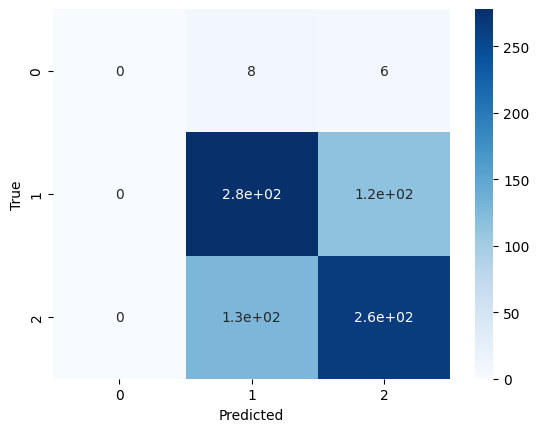

In [269]:
import seaborn as sns


# 绘制混淆矩阵
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [270]:
y_pred_1=tf.reshape(y_pred,[799,3])
y_pred_1=[2 if i[2]>i[1]+0.05 else 1 for i in y_pred_1]

In [271]:
confusion_matrix = tf.math.confusion_matrix(label, y_pred_1)

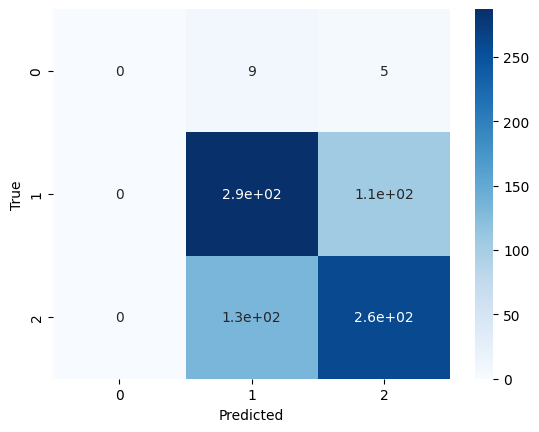

In [272]:
import seaborn as sns


# 绘制混淆矩阵
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

模型保存

In [273]:
# # 定义输入和输出
# inputs = {'input_image': model.input}
# outputs = {'output_scores': model.output}

# 导出模型
# tf.saved_model.save(model, pre_path+"modelTPU4multiClassfier(exceptAge)")

In [274]:
# model_load=tf.saved_model.load(pre_path+"model4multiClassfier")

In [275]:
# print(model_load.signatures.keys())

In [276]:
# model.predict(ds_valid_)

In [277]:
# for e in ds_valid:
#   print(e[1])
#   # print(e[0])
#   prediction=model_load.signatures['serving_default'](e[0])
#   print(prediction)
#   # print([1 if i>0.5 else 0 for i in l ])
#   break

In [278]:
# print(prediction['dense_9'].numpy())

In [279]:
# print([1 if i>0.5 else 0 for i in prediction['dense_9'].numpy()[0]])